This notebook describes how to create plots for the netCDF file(s) obtained after executing `DIVAnd`.     
We will use the [NCDatasets](https://github.com/Alexander-Barth/NCDatasets.jl) module (instead of [NetCDF](https://github.com/JuliaGeo/NetCDF.jl)) to read the result files and [PyPlot](https://github.com/JuliaPy/PyPlot.jl).

In [2]:
using NCDatasets  
using PyPlot

Adapt the file directory and name.      
We can use for example the salinity analysis produced by [15-example-analysis](./15-example-analysis.ipynb).

In [3]:
datadir = "./"
datafile = joinpath(datadir, "Water_body_Salinity.4Danl.nc")
if isfile(datafile)
    info("File exist") 
else
    error("File does not exist")
end

02-avril 21:56:41:INFO:root:File exist


Open the dataset from the file for reading

In [4]:
info("Reading dataset")
ds = Dataset(datafile)

02-avril 21:56:44:INFO:root:Reading dataset


Dataset: ./Water_body_Salinity.4Danl.nc
Group: /

Dimensions
   lon = 76
   lat = 36
   depth = 3
   time = 8
   nv = 2

Variables
  lon   (76)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
     units                = degrees_east
     standard_name        = longitude
     long_name            = longitude

  lat   (36)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     units                = degrees_north
     standard_name        = latitude
     long_name            = latitude

  depth   (3)
    Datatype:    Float64
    Dimensions:  depth
    Attributes:
     units                = meters
     positive             = down
     standard_name        = depth
     long_name            = depth below sea level

  time   (8)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = days since 1900-01-01 00:00:00
     standard_name        = time
     long_name            = time
     calendar             = standard

  Salinity   (

From the dataset we can extract the dimensions and variables of interest.

In [5]:
lon = ds["lon"];
lat = ds["lat"];
depth = ds["depth"];
ttime = ds["time"];
salinity = ds["Salinity"];

Note that the time variable is an array of dates:

In [7]:
ttime

8-element NCDatasets.CFVariable{Float64,Float64,1}:
 1993-02-16T00:00:00
 1993-05-16T00:00:00
 1993-08-16T00:00:00
 1993-11-16T00:00:00
 1994-02-16T00:00:00
 1994-05-16T00:00:00
 1994-08-16T00:00:00
 1994-11-16T00:00:00

# Create plots
## Simple pseudo color plot
Let's assume we want to plot a given time period at a given depth:

In [8]:
depthplot = 20.;

First we extract the indices of the the time and depth arrays.

In [9]:
timeindex = 4;
depthindex = find(depth .== depthplot)[1];
info("Time index: $timeindex")
info("Depth index: $depthindex")

02-avril 21:57:44:INFO:root:Time index: 4
02-avril 21:57:44:INFO:root:Depth index: 2


Then we extract the 2-D salinity field. If we are not sure about the dimension order, we can check the matrix size.

In [10]:
@show size(salinity);
salinityplot = salinity[:, :, depthindex, timeindex];
@show size(salinityplot);
salinityplot = salinityplot.data;

size(salinity) = (76, 36, 3, 8)
size(salinityplot) = (76, 36)


### First plot
We use the `pcolormesh` (pseudo-color) function:

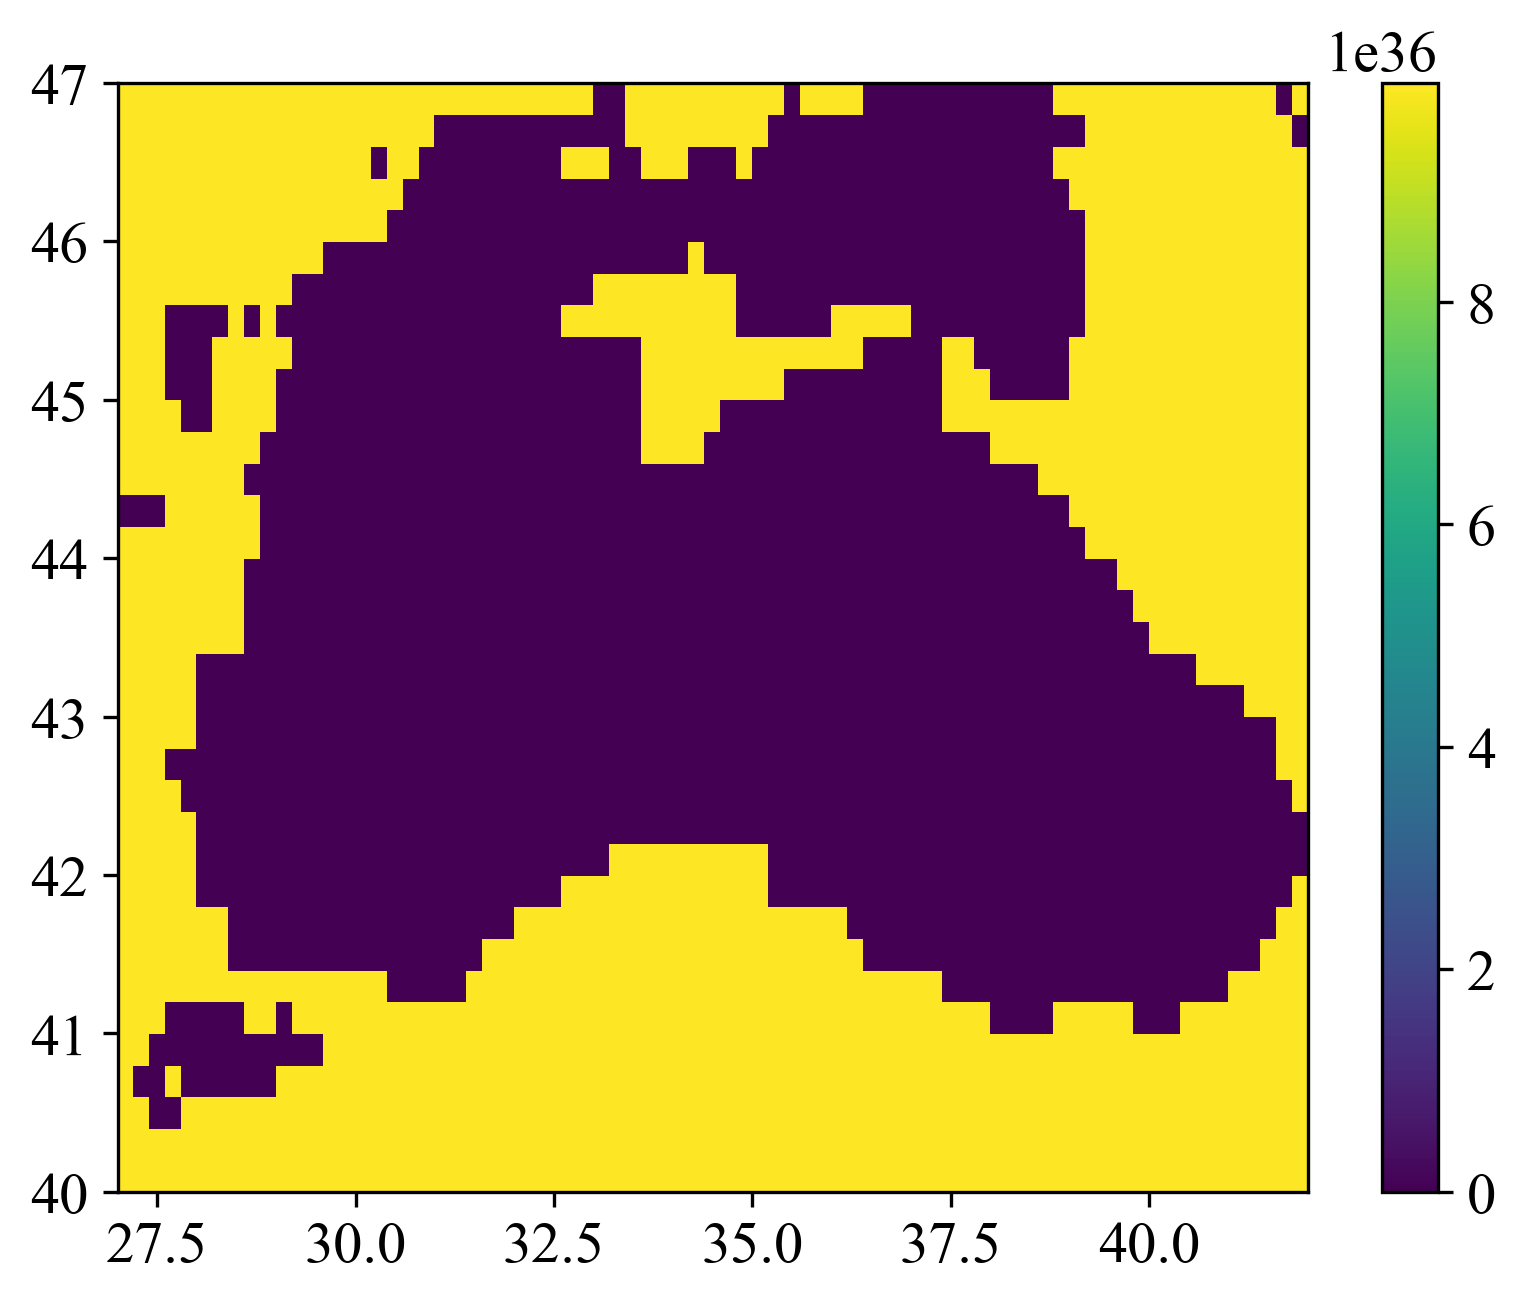

In [11]:
pcolormesh(lon, lat, transpose(salinityplot))
colorbar()
show()

### Masking landObviously the land-sea mask was not taken into account in the previous figure.     
We replace the *fill value* by NaN:

In [21]:
fill_value = salinity.attrib["_FillValue"]
salinityplot[salinityplot .== fill_value] = NaN;
@show fill_value;

fill_value = 9.96921f36


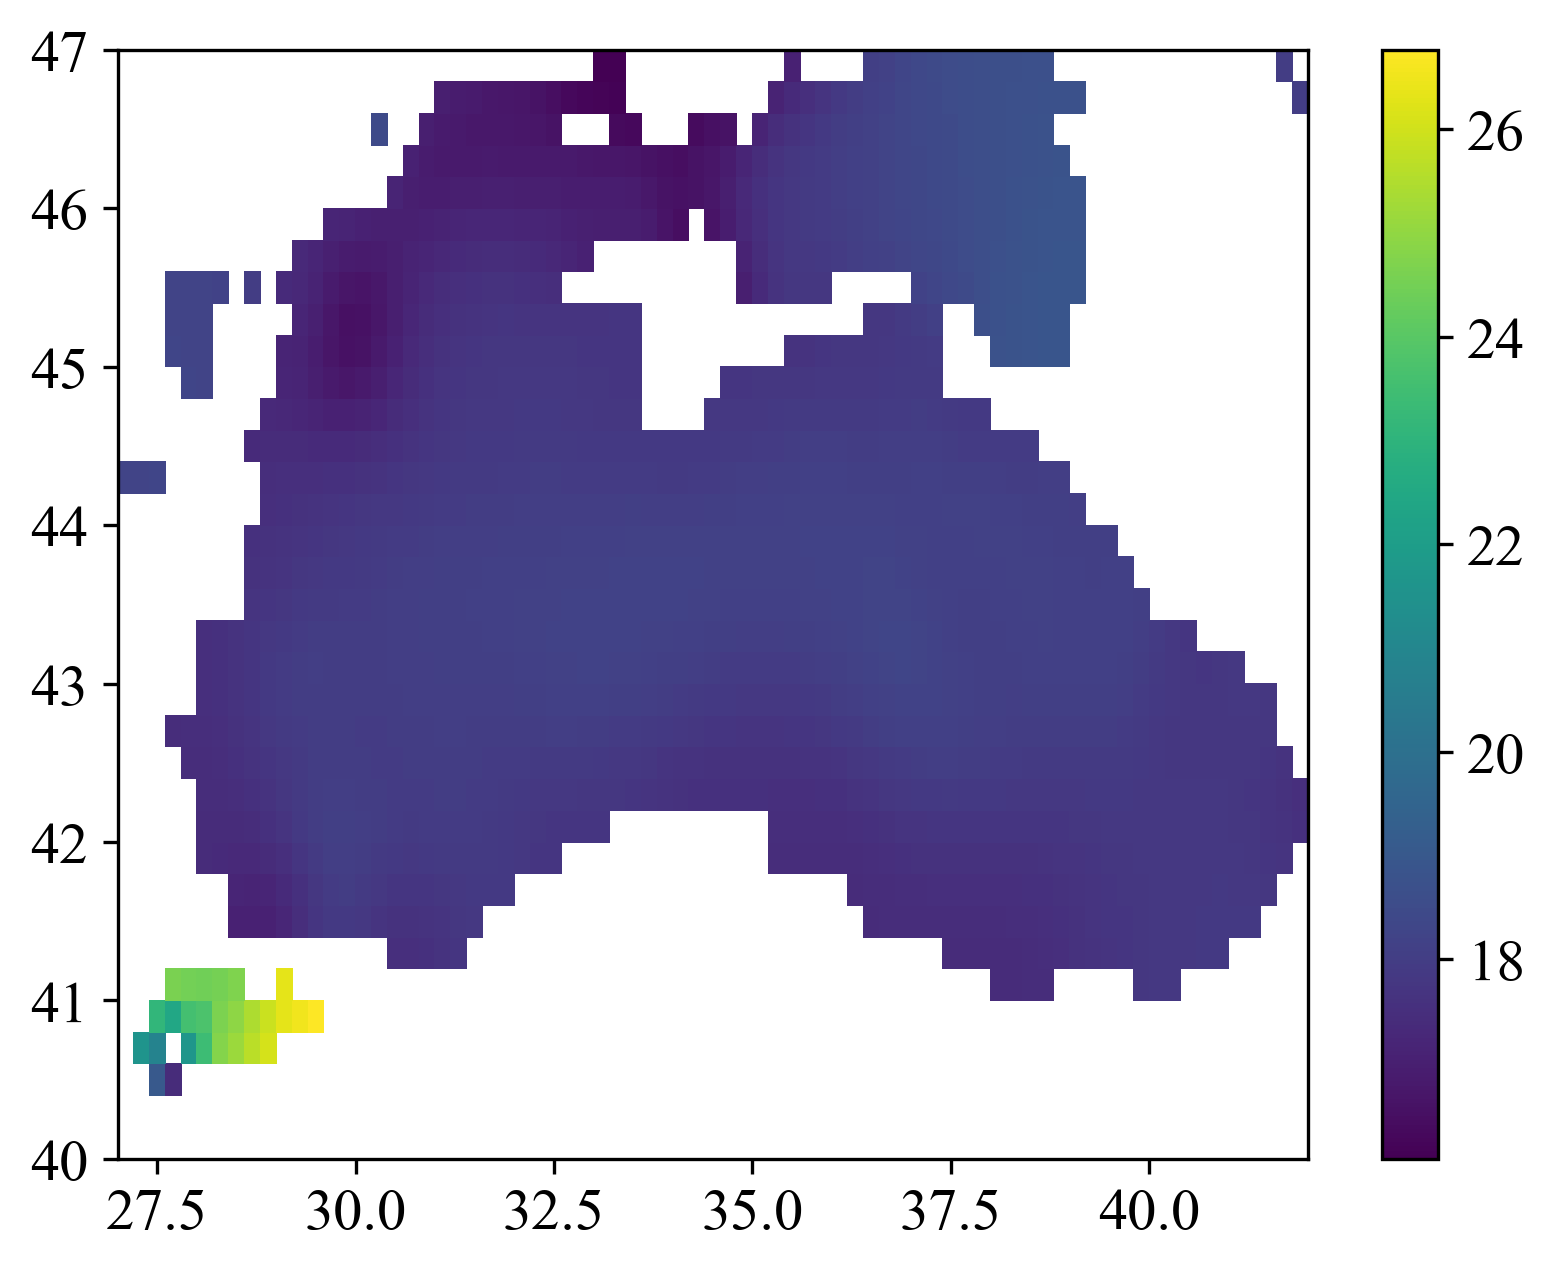

PyObject <matplotlib.colorbar.Colorbar object at 0x7f51347beb50>

In [22]:
pcolormesh(lon, lat, transpose(salinityplot));
colorbar()

## Contour plots
We explicitely specify the levels to be represented (from 15 to 25).    

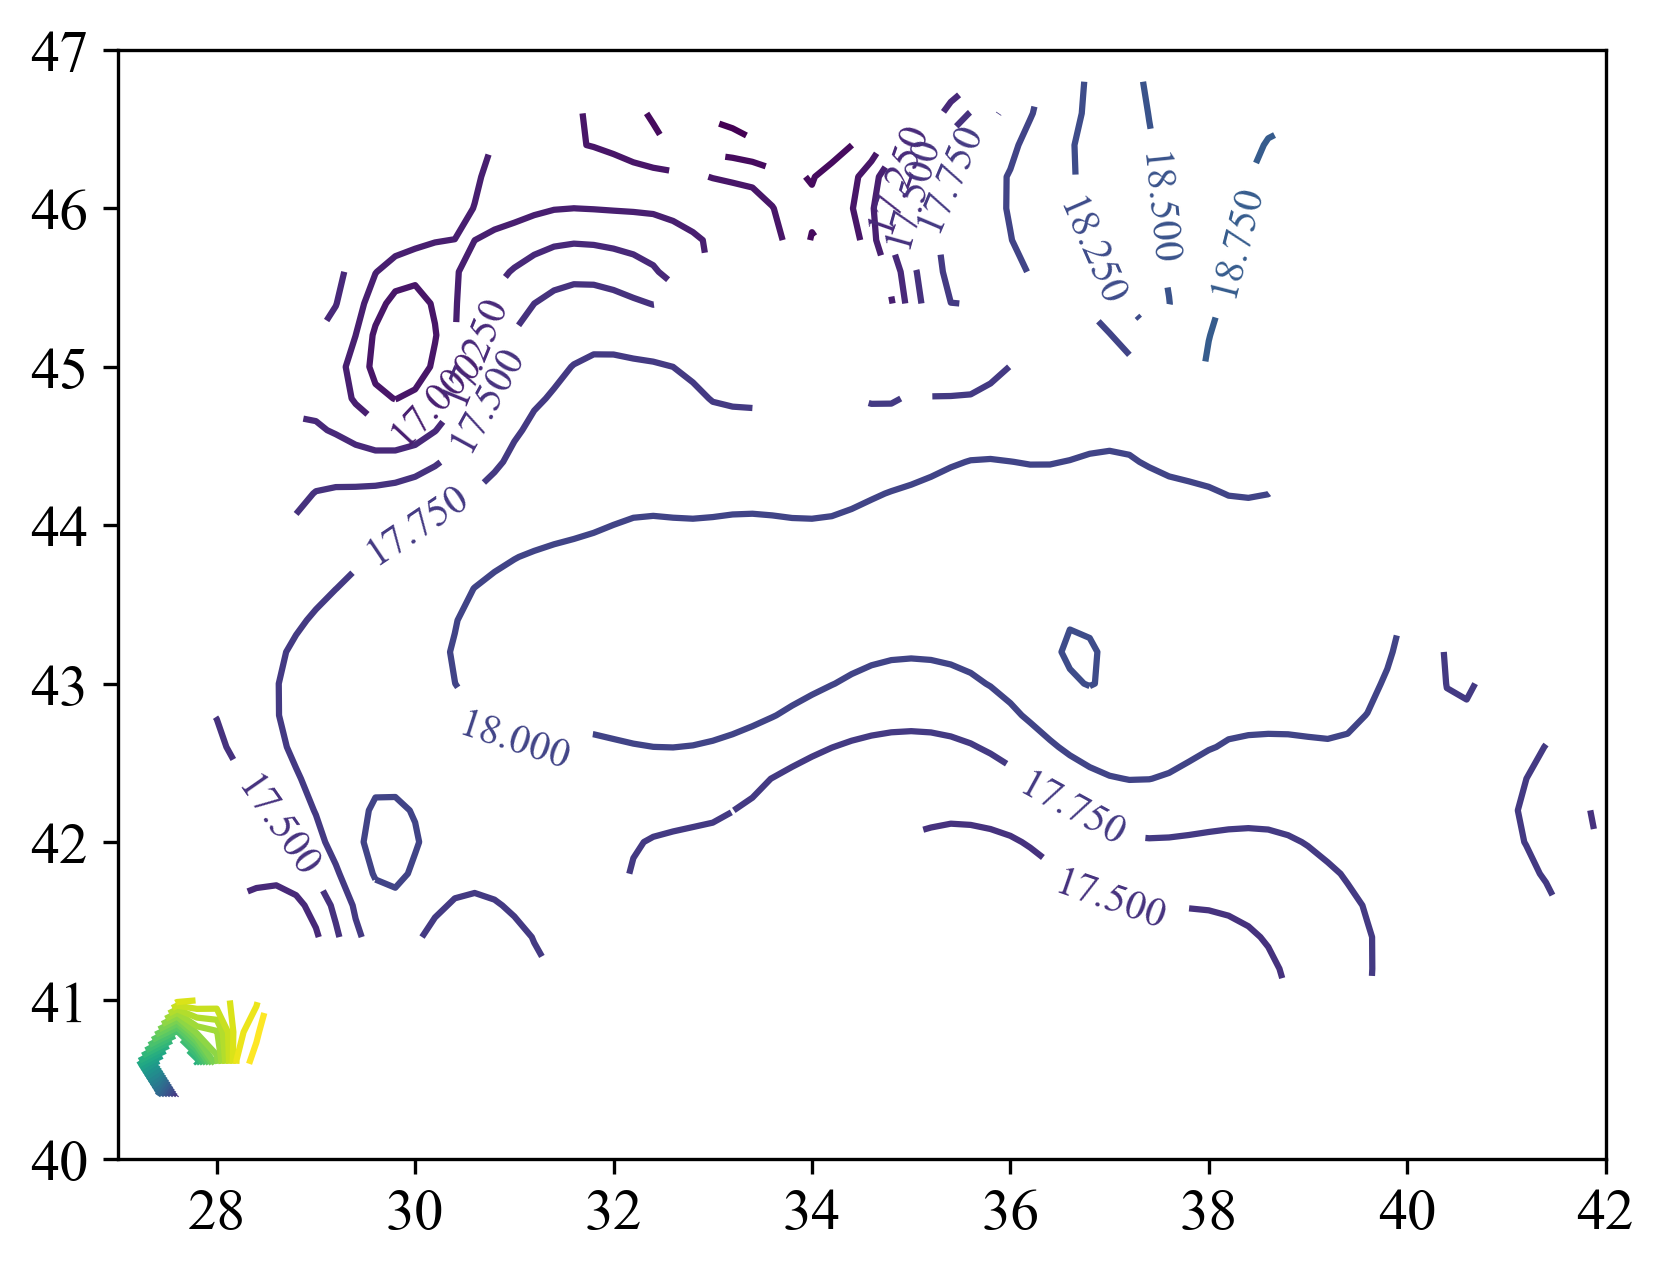

In [23]:
conts = contour(lon, lat, transpose(salinityplot), levels=collect(15:.25:25))
clabel(conts, inline=1, fontsize=10);

## Filled contour plots
The aspect is somehow different from the pcolor.

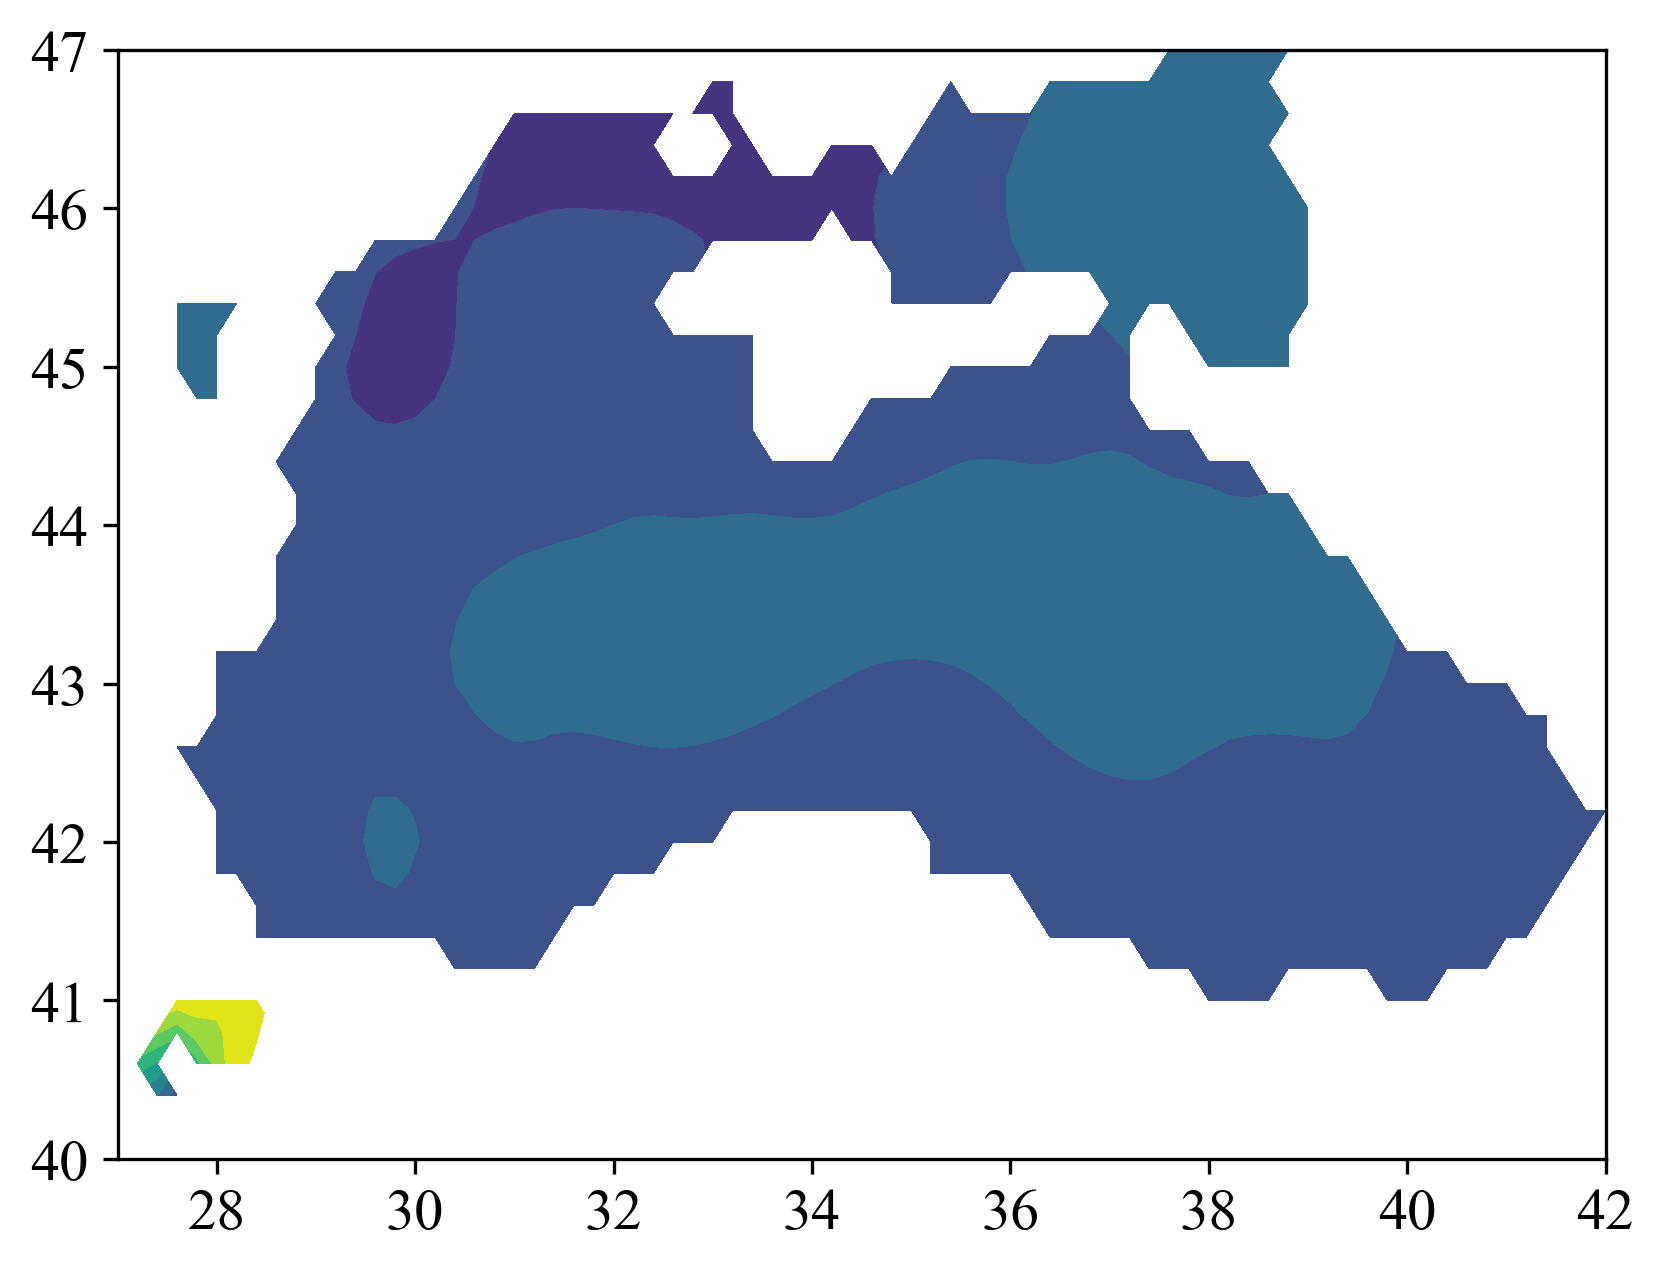

PyObject <matplotlib.contour.QuadContourSet object at 0x7f5134404090>

In [24]:
contourf(lon, lat, transpose(salinityplot), levels=collect(15:1:25))